In [1]:
!pip install kneed

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


In [4]:
import pandas as pd
from kneed import KneeLocator
import re
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
data = pd.read_csv("/content/gdrive/Shareddrives/PMA kelompok 5/Clustering.csv")
data.sample(10)

,news_title
130,paus fransiskus indonesia pbnu indonesia conto...
961,usung koalisi gemuk abdul halim muslih aris su...
682,daftar akhir setia optimis menang pilkada kota...
319,jalan gemilang man 2 kota malang 10 medali osn...
1102,terima b1 kwk partai golkar khofifah emil pede...
977,bawaslu ri kpu ri dkpp dpr perintah sepakat at...
128,paus fransiskus pesawat komersial muhammadiyah...
820,daftar kpu anton dimyati resmi maju pilkada ko...
744,bpkh jajak kerjasama strategis uin maliki malang
1111,psi resmi dukung ahmad luthfi taj yasin pilgub...


In [6]:
# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['news_title'])

In [7]:
X.shape

(1500, 4023)

In [8]:
data.shape

(1500, 1)

In [9]:
# Ubah sparse matrix ke array
X = X.toarray()

In [20]:
# Menggunakan PCA dengan dua komponen
pca = PCA(n_components=750, random_state=42)
X_pca = pca.fit_transform(X)

In [11]:
X_pca.shape

(1500, 2)

In [21]:
# Variansi yang dijelaskan oleh setiap komponen utama
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_explained = explained_variance_ratio.sum()

print("Variansi dijelaskan oleh komponen pertama:", explained_variance_ratio[0])
print("Variansi dijelaskan oleh komponen kedua:", explained_variance_ratio[1])
print("Total variansi yang dijelaskan oleh dua komponen:", total_variance_explained)

Variansi dijelaskan oleh komponen pertama: 0.009570207239792147
Variansi dijelaskan oleh komponen kedua: 0.006952177176415231
Total variansi yang dijelaskan oleh dua komponen: 0.8124590576655462


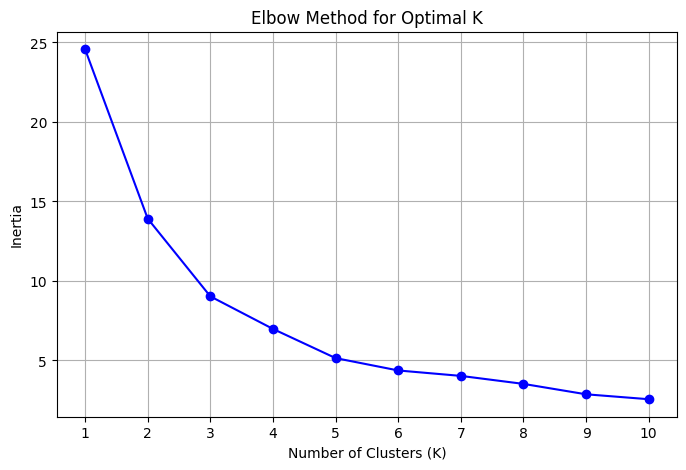

In [13]:
# Metode Elbow
inertia = []
K = range(1, 11)  # Mencoba nilai K dari 1 hingga 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(K)
plt.grid()
plt.show()

In [14]:
# Menggunakan KneeLocator untuk mendeteksi titik elbow
kneedle = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

print("Nilai K optimal berdasarkan metode elbow:", optimal_k)

Nilai K optimal berdasarkan metode elbow: 3


In [16]:
# Fungsi visualisasi
def plot_clustering(reduced_data, cluster_labels, method_title, sil_score):
    """
    Parameters:
    reduced_data : array dengan shape (n_samples, 2) - hasil PCA atau t-SNE
    cluster_labels : array hasil KMeans clustering
    method_title : string - judul plot (PCA atau t-SNE)
    sil_score : float - nilai silhouette score
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
                         c=cluster_labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(f'{method_title}\nSilhouette Score: {sil_score:.3f}')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

Shape data PCA: (1500, 2)


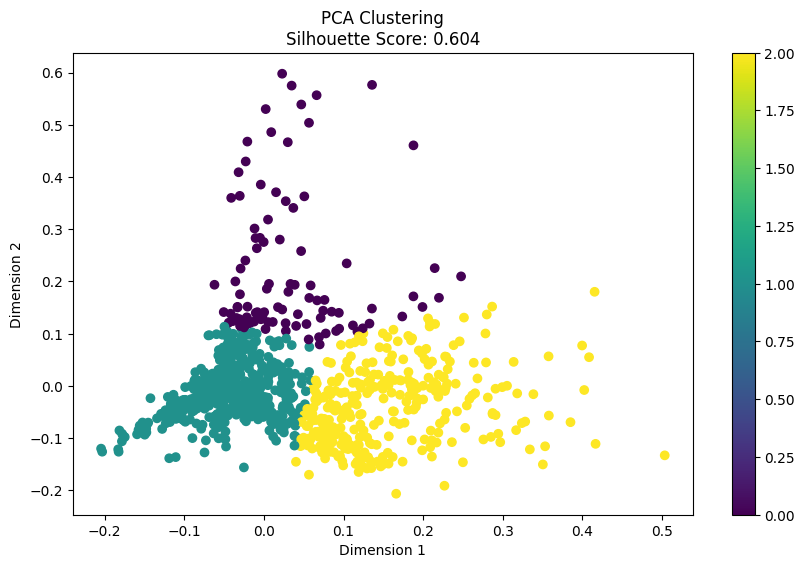

PCA Silhouette Score: 0.604


In [17]:
# 1. Baseline PCA result (menggunakan X_pca yang sudah ada)

print("Shape data PCA:", X_pca.shape)  # Memastikan shape (1500, 2)
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)
sil_score_pca = silhouette_score(X_pca, labels_pca)

# Plot hasil PCA
plot_clustering(
    reduced_data=X_pca,  # Data yang sudah direduksi dengan PCA
    cluster_labels=labels_pca,  # Label hasil clustering
    method_title='PCA Clustering',
    sil_score=sil_score_pca
)
print(f"PCA Silhouette Score: {sil_score_pca:.3f}")


Shape data input t-SNE: (1500, 4023)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Shape hasil t-SNE: (1500, 2)
Perplexity: 5, Early Exaggeration: 4
Silhouette Score: 0.380
Time taken: 16.82 seconds


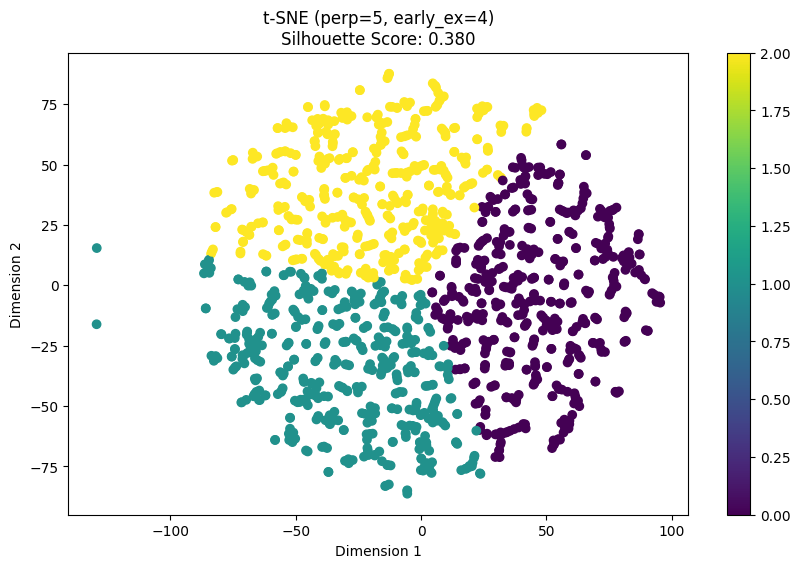

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Shape hasil t-SNE: (1500, 2)
Perplexity: 5, Early Exaggeration: 12
Silhouette Score: 0.367
Time taken: 20.30 seconds


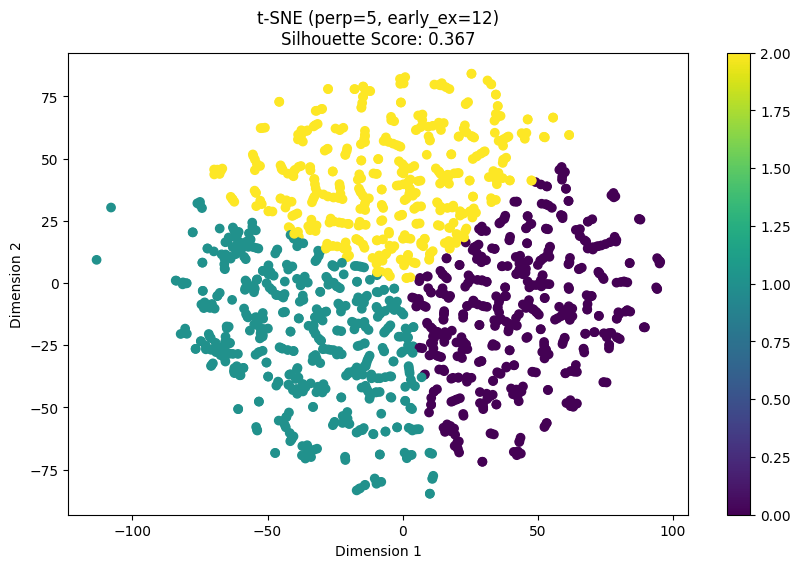

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Shape hasil t-SNE: (1500, 2)
Perplexity: 5, Early Exaggeration: 20
Silhouette Score: 0.361
Time taken: 38.71 seconds


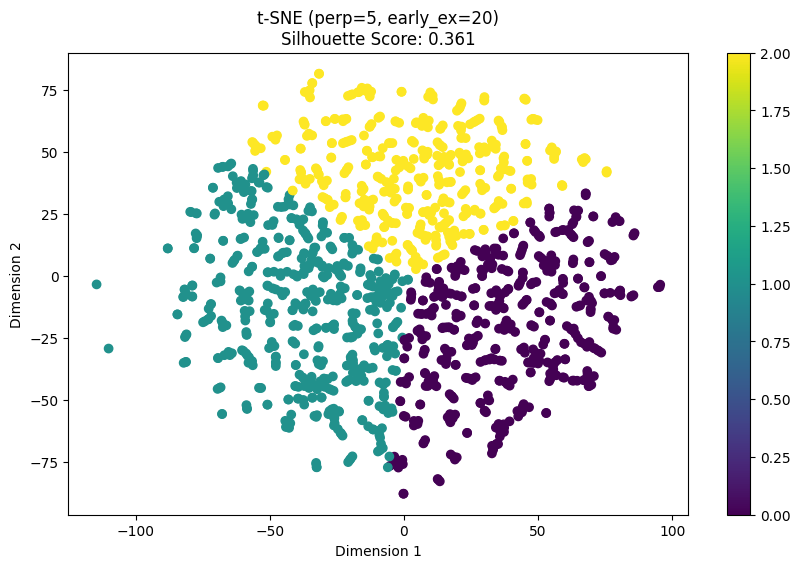

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Shape hasil t-SNE: (1500, 2)
Perplexity: 30, Early Exaggeration: 4
Silhouette Score: 0.372
Time taken: 20.61 seconds


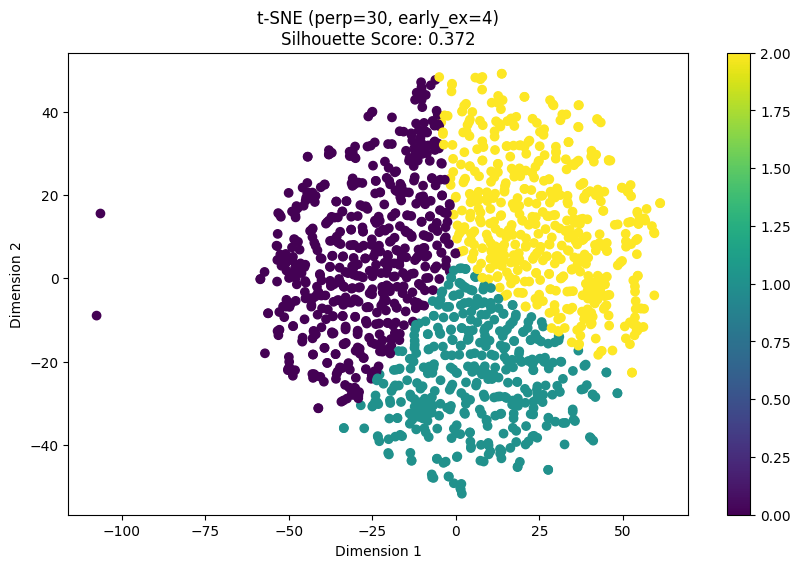

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Shape hasil t-SNE: (1500, 2)
Perplexity: 30, Early Exaggeration: 12
Silhouette Score: 0.386
Time taken: 24.31 seconds


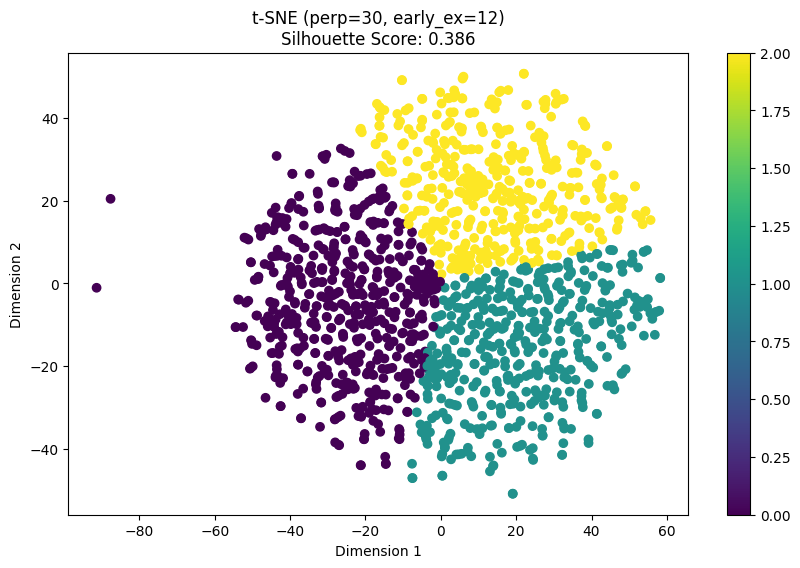

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Shape hasil t-SNE: (1500, 2)
Perplexity: 30, Early Exaggeration: 20
Silhouette Score: 0.381
Time taken: 24.81 seconds


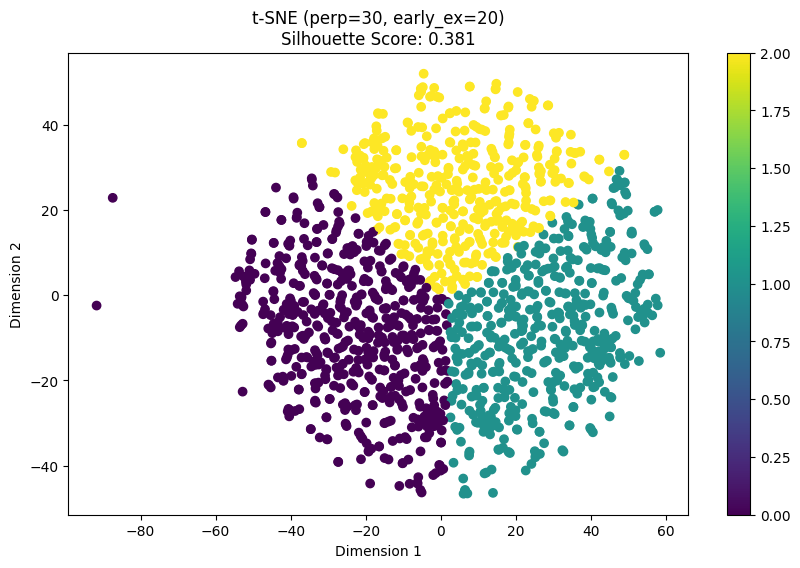

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Shape hasil t-SNE: (1500, 2)
Perplexity: 50, Early Exaggeration: 4
Silhouette Score: 0.378
Time taken: 24.45 seconds


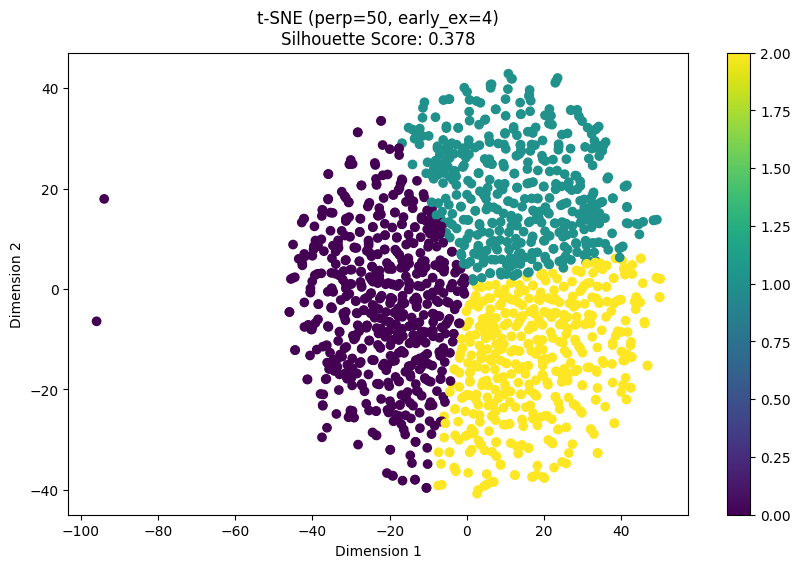

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Shape hasil t-SNE: (1500, 2)
Perplexity: 50, Early Exaggeration: 12
Silhouette Score: 0.380
Time taken: 26.33 seconds


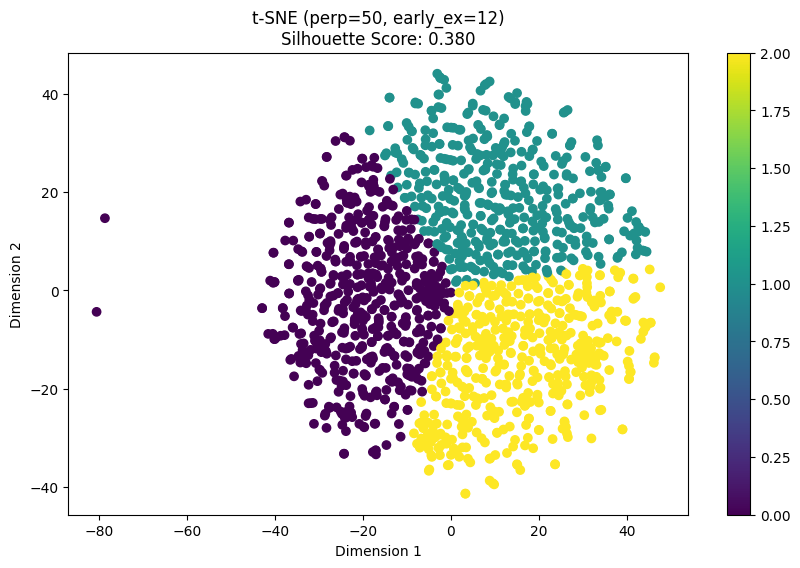

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Shape hasil t-SNE: (1500, 2)
Perplexity: 50, Early Exaggeration: 20
Silhouette Score: 0.381
Time taken: 26.18 seconds


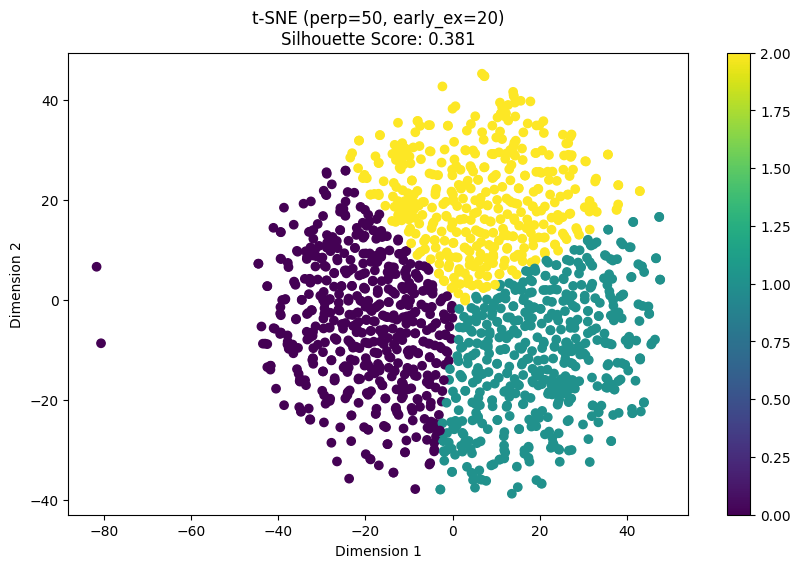

In [18]:
# 2. Eksperimen dengan berbagai parameter t-SNE

perplexities = [5, 30, 50]
early_exaggerations = [4, 12, 20]
results = []

print("\nShape data input t-SNE:", X.shape)

for perp in perplexities:
    for early_ex in early_exaggerations:
        start_time = time.time()

        # Fit t-SNE
        tsne = TSNE(
            n_components=2,
            random_state=42,
            perplexity=perp,
            early_exaggeration=early_ex,
            learning_rate='auto',
            n_iter=1000
        )

        # Reduksi dimensi dengan t-SNE
        X_tsne = tsne.fit_transform(X)  # Menggunakan data asli (1500, 300)
        print(f"\nShape hasil t-SNE: {X_tsne.shape}")  # Memastikan shape (1500, 2)

        # Clustering
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        labels_tsne = kmeans.fit_predict(X_tsne)

        # Evaluasi
        sil_score_tsne = silhouette_score(X_tsne, labels_tsne)
        time_taken = time.time() - start_time

        # Simpan hasil
        results.append({
            'perplexity': perp,
            'early_exaggeration': early_ex,
            'silhouette': sil_score_tsne,
            'time': time_taken,
            'embedding': X_tsne,
            'labels': labels_tsne
        })

        print(f"Perplexity: {perp}, Early Exaggeration: {early_ex}")
        print(f"Silhouette Score: {sil_score_tsne:.3f}")
        print(f"Time taken: {time_taken:.2f} seconds")

        # Plot hasil t-SNE
        plot_clustering(
            reduced_data=X_tsne,  # Data yang sudah direduksi dengan t-SNE
            cluster_labels=labels_tsne,  # Label hasil clustering
            method_title=f't-SNE (perp={perp}, early_ex={early_ex})',
            sil_score=sil_score_tsne
        )


Ringkasan hasil semua eksperimen:
   perplexity  early_exaggeration  silhouette       time
0           5                   4    0.379604  16.822474
1           5                  12    0.366967  20.298689
2           5                  20    0.361045  38.712699
3          30                   4    0.371554  20.614362
4          30                  12    0.385552  24.308728
5          30                  20    0.380905  24.813750
6          50                   4    0.378128  24.451973
7          50                  12    0.380324  26.327790
8          50                  20    0.381121  26.179477


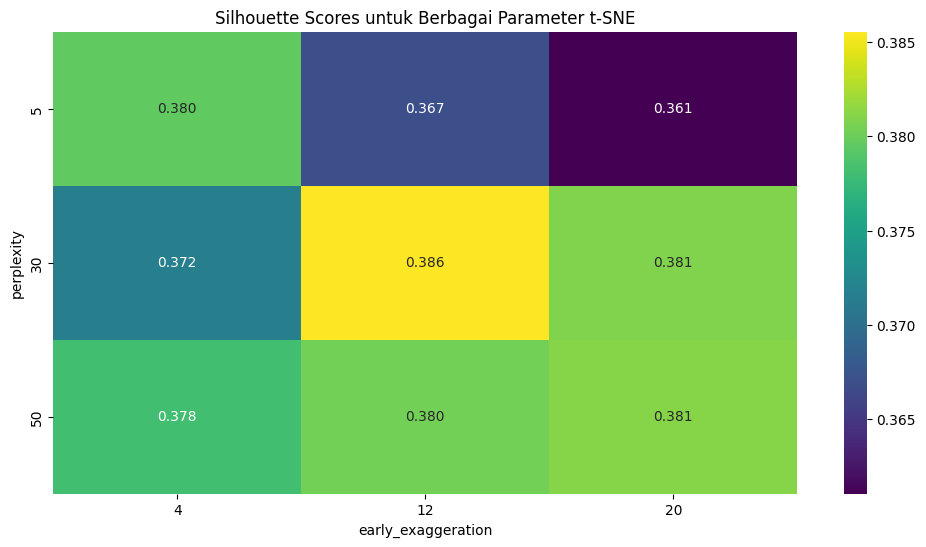

In [19]:
# Menampilkan perbandingan hasil dalam bentuk tabel
results_df = pd.DataFrame([
    {
        'perplexity': r['perplexity'],
        'early_exaggeration': r['early_exaggeration'],
        'silhouette': r['silhouette'],
        'time': r['time']
    }
    for r in results
])
print("\nRingkasan hasil semua eksperimen:")
print(results_df)

# Visualisasi perbandingan parameter
plt.figure(figsize=(12, 6))
sns.heatmap(
    results_df.pivot(
        index='perplexity',
        columns='early_exaggeration',
        values='silhouette'
    ),
    annot=True,
    fmt='.3f',
    cmap='viridis'
)
plt.title('Silhouette Scores untuk Berbagai Parameter t-SNE')
plt.show()